In [1]:
from __future__ import print_function, division
import matplotlib

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
import seaborn as sns
cudnn.benchmark = True
import sklearn.metrics as metrics
from PIL import Image
from prettytable import PrettyTable
import cv2

In [2]:
output_path = "Z://RR/Final/report_work/output_distributions/UTKFace"

def show_image(file_path):
	# full_path = file_prefix + '/'+file_path
	img = cv2.imread(file_path)[:,:,::-1]
	plt.imshow(img)
	plt.show()

In [3]:
dataset_path = 'Z://RR/UTKFace/labels/processed_aligned_UTKFace.csv'
UTKFace_df = pd.read_csv(dataset_path).rename(columns={"name":"file"})

UTKFace_df.drop(['Unnamed: 0','label'],axis =1,inplace = True)
UTKFace_df = UTKFace_df[UTKFace_df['ethnicity'] != 'Others']

In [4]:
UTKFace_df.head()

,file,age,gender,ethnicity,age_group,new_ethnicity
0,Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...,100,0,white,more_than_70,white
1,Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...,100,0,white,more_than_70,white
2,Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...,100,1,white,more_than_70,white
3,Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...,100,1,white,more_than_70,white
4,Z://RR/UTKFace/utkface_aligned_cropped/UTKFace...,100,1,white,more_than_70,white


In [5]:
age_dist = UTKFace_df.age_group.value_counts().reset_index(name = "count").rename(columns={"index":"age"})
race_dist = UTKFace_df.new_ethnicity.value_counts().reset_index(name = "count").rename(columns={"index":"new_ethnicity"})
gender_dist = UTKFace_df.gender.value_counts().reset_index(name = "count").rename(columns={"index":"gender"})
gender_dist['gender'] = gender_dist['gender'].replace([0],'Male')
gender_dist['gender'] = gender_dist['gender'].replace([1],'Female')


age_dist.sort_values(by = ['age'],inplace=True)

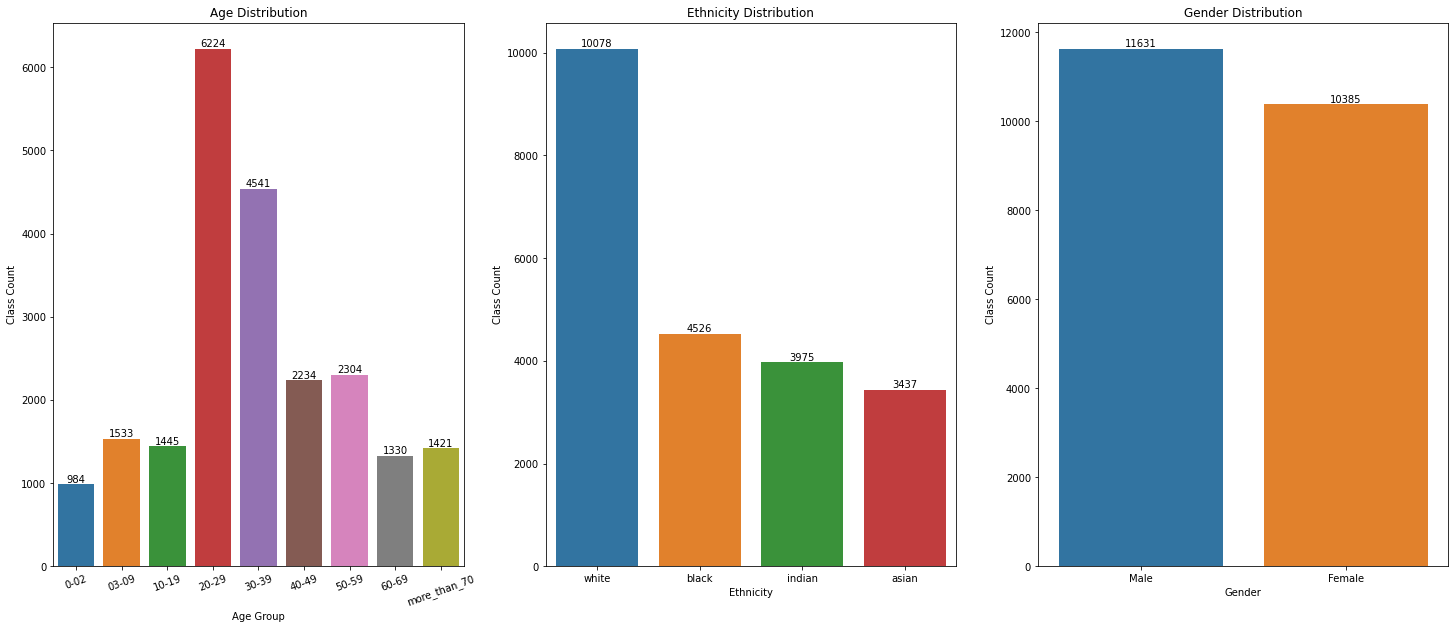

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))
ax = axs.ravel()

plot = sns.barplot(x = age_dist.iloc[:, 0], y = age_dist.iloc[:, 1],ax=ax[0])

ax[0].set_title(F"Age Distribution")
ax[0].set_ylabel('Class Count')
ax[0].set_xlabel('Age Group')
plot.bar_label(plot.containers[0])
_ = ax[0].set_xticklabels(age_dist.iloc[:, 0], rotation=20)

plot = sns.barplot(x = race_dist.iloc[:, 0], y = race_dist.iloc[:, 1],ax=ax[1])
ax[1].set_title(F"Ethnicity Distribution")
ax[1].set_ylabel('Class Count')
ax[1].set_xlabel('Ethnicity')
# ax[1].set_xticklabels(['Male','Female'])
plot.bar_label(plot.containers[0])
# _ = ax[1].set_xticklabels(race_dist.iloc[:, 0], rotation=20)

plot = sns.barplot(x = gender_dist.iloc[:, 0], y = gender_dist.iloc[:, 1],ax=ax[2])
ax[2].set_title(F"Gender Distribution")
ax[2].set_ylabel('Class Count')
ax[2].set_xlabel('Gender')
_ = plot.bar_label(plot.containers[0])

plt.savefig(os.path.join(output_path,'test_overall_dist.jpg'))

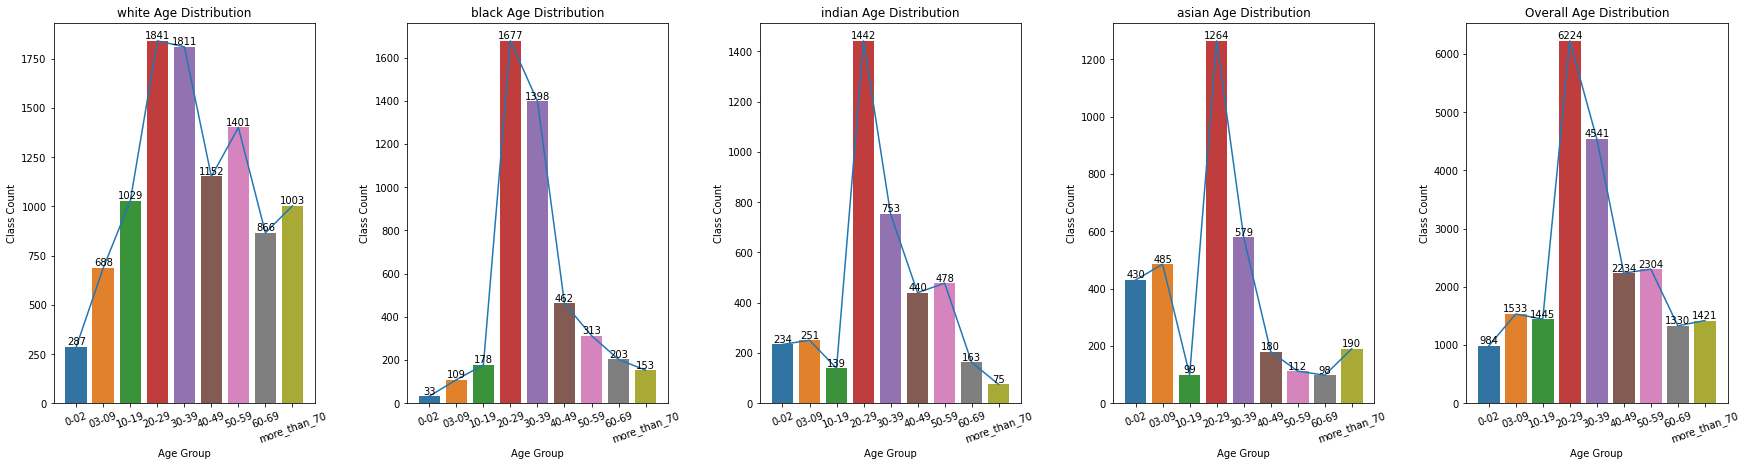

In [12]:
  
fig, axs = plt.subplots(1, 5, figsize=(30, 7))
ax = axs.ravel()
plt.subplots_adjust(hspace=0.25,wspace=0.35)


for i,r in enumerate(race_dist.iloc[:, 0]):
	temp_df = UTKFace_df[UTKFace_df['ethnicity'] == r]
	age_dist_r = temp_df.age_group.value_counts().reset_index(name = "count").rename(columns={"index":"age"})
	age_dist_r.sort_values(by = ['age'],inplace=True)

	plot = sns.barplot(x = age_dist_r.iloc[:, 0], y = age_dist_r.iloc[:, 1],ax=ax[i])
	plot = sns.lineplot(x = age_dist_r.iloc[:, 0], y = age_dist_r.iloc[:, 1],ax=ax[i])
 
	ax[i].set_title(F"{r} Age Distribution")
	ax[i].set_ylabel('Class Count')
	ax[i].set_xlabel('Age Group')
	plot.bar_label(plot.containers[0])
	_ = ax[i].set_xticklabels(age_dist_r.iloc[:, 0], rotation=20)
 
	
plot = sns.barplot(x = age_dist.iloc[:, 0], y = age_dist.iloc[:, 1],ax=ax[len(race_dist.iloc[:, 0])])
plot = sns.lineplot(x = age_dist.iloc[:, 0], y = age_dist.iloc[:, 1],ax=ax[len(race_dist.iloc[:, 0])])

ax[len(race_dist.iloc[:, 0])].set_title(F"Overall Age Distribution")
ax[len(race_dist.iloc[:, 0])].set_ylabel('Class Count')
ax[len(race_dist.iloc[:, 0])].set_xlabel('Age Group')
plot.bar_label(plot.containers[0])
_ = ax[len(race_dist.iloc[:, 0])].set_xticklabels(age_dist_r.iloc[:, 0], rotation=20)

plt.savefig(os.path.join(output_path,'test_eth_age_dist.jpg'))

 

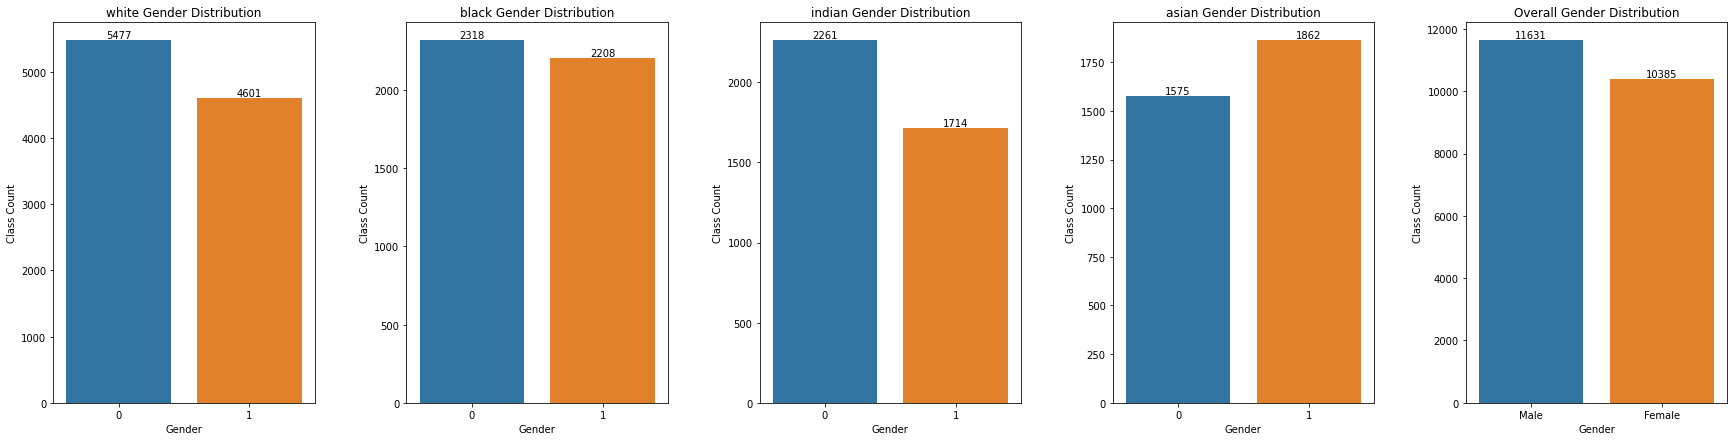

In [26]:
  
fig, axs = plt.subplots(1, 5, figsize=(30, 7))
ax = axs.ravel()
plt.subplots_adjust(hspace=0.25,wspace=0.35)


for i,r in enumerate(race_dist.iloc[:, 0]):
	temp_df = UTKFace_df[UTKFace_df['ethnicity'] == r]
	dist_r = temp_df.gender.value_counts().reset_index(name = "count").rename(columns={"index":"gender"})
 
	plot = sns.barplot(x = dist_r.iloc[:, 0], y = dist_r.iloc[:, 1],ax=ax[i])
	# plot = sns.lineplot(x = dist_r.iloc[:, 0], y = dist_r.iloc[:, 1],ax=ax[i])
 
	ax[i].set_title(F"{r} Gender Distribution")
	ax[i].set_ylabel('Class Count')
	ax[i].set_xlabel('Gender')
	plot.bar_label(plot.containers[0])
	# _ = ax[i].set_xticklabels(dist_r.iloc[:, 0], rotation=20)
 
	
plot = sns.barplot(x = gender_dist.iloc[:, 0], y = gender_dist.iloc[:, 1],ax=ax[len(race_dist.iloc[:, 0])])
# plot = sns.lineplot(x = gender_dist.iloc[:, 0], y = gender_dist.iloc[:, 1],ax=ax[len(race_dist.iloc[:, 0])])

ax[len(race_dist.iloc[:, 0])].set_title(F"Overall Gender Distribution")
ax[len(race_dist.iloc[:, 0])].set_ylabel('Class Count')
ax[len(race_dist.iloc[:, 0])].set_xlabel('Gender')
plot.bar_label(plot.containers[0])
# _ = ax[len(race_dist.iloc[:, 0])].set_xticklabels(dist_r.iloc[:, 0], rotation=20)

plt.savefig(os.path.join(output_path,'test_eth_gender_dist.jpg'))

 